In [1]:
### BEGIN hide_toggle
### Update 30/10-'20
def hide_toggle_code(off=0):
    """This function generates HTML code to toggle the display of an input
    cell.
    
    The output of the cell will still be displayed.  This can be used
    to hide (from immediate view) some code to generate data or the
    like.  It can also be used to hide other notebook explicit
    implementations - e.g., C++ processing, or the like.
    
    Note, calling this function alone will not enable toggling.
    Instead, we must wrap the generated code in an
    `IPython.display.HTML` object and return that as the cell value.
    This will let IPython evaluate the HTML code and pass it on to the
    browser.
    
    If all one wants is to toggle a cell one can use the function
    `hide_toggle` below.  However, we can also combine the code
    generated here with other HTML code - for example _style_
    declarations and pass that along embedded in an HTML object.
    
    Parameters
    ----------
    off : int 
        Offset of cell to hide relative to the cell calling this function 
    
    Returns
    -------
    code : str 
        HTML code to enable toggling of the cell

    """
    from random import randint 
    from IPython.display import HTML 
    
    jp_cell     = 'document.getElementsByClassName("jp-Cell jp-mod-selected")[0]'
    jq_cell     = '$("div.cell.code_cell.rendered.selected")'
    toggle_text = 'Please close'
    cell_id     = str(randint(1,2**64))
    func_name   = f'code_toggle_{cell_id}'
    
    scr1 = f'''
    <script id="s{cell_id}">
      function {func_name}() {{
          if (typeof $ == "undefined") {{
              // console.log("For JupyterLab (no jQuery)")
              var c  = {jp_cell};
              // console.log(c);
              var iw = c.getElementsByClassName("jp-Cell-inputArea")[0];
              var op = c.getElementsByClassName("jp-OutputPrompt")[0];
              // console.log(iw,op)
              if (iw.style.display !== undefined && iw.style.display === "none") {{
                  iw.style.display = null;
                  op.style.display = null;
              }} else {{
                  iw.style.display = "none";
                  op.style.display = "none";
              }}
           }}
           else {{
                console.log('Will toggle input display {jp_cell}')
                console.log({jp_cell})
                {jq_cell}.find("div.input").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.prompt.output_prompt").toggle();
                console.log('End toggle input display {jp_cell}')
           }}
      }}  
    </script>
    '''
    but = f'''
     <details style='z-index:99;position:relative;color:lightgray;' 
             onclick='javascript:{func_name}()'>
        <summary>&gt;</summary>
    </details>
    '''
    scr2 = f'''
    <script>
      var c = null;
      if (typeof $ == "undefined") {{
         var c  = document.getElementById("s{cell_id}");
         var p  = c.parentNode.parentNode.parentNode.parentNode.parentNode;
         var iw = p.getElementsByClassName("jp-Cell-inputArea")[0];
         var op = p.getElementsByClassName("jp-OutputPrompt")[0];
         var ou = c.parentNode;
         iw.style.display = "none";
         op.style.display = "none";
         ou.style.background = "transparent";
      }}
      else {{
          var p = $('#s{cell_id}').parents();
          p.siblings('div.input').hide();
          p.find('div.prompt.output_prompt').hide()
          p.find('div.out_prompt_overlay.prompt').hide()      
      }}
      // {func_name}
    </script>
    '''
    return scr1+but+scr2        

def hide_toggle(off=0,cnt=None):
    """This will wrap the HTML code returned from the above function
    in an `IPython.display.HTML` object so that the notebook will 
    evaluate the HTML code. 
    
    This function is what we will use most of the time.  However, 
    the function `hide_toggle_code` can be combined with other code 
    and then be put  into an HTML object to let the notebook evaluate
    all the code. 

    Parameters 
    ----------
    off : int 
        Cell offset relative to calling cell which we should toggle 
    cnt : int or None 
        If not None, set the execution count to this number 
        (currently broken)
        
    Returns
    -------
    object : IPython.display.HTML 
        HTML object wrapping code to toggle cell 
    """
    from IPython.display import HTML
    if cnt is not None:
        get_ipython().execution_count = cnt
    return HTML(hide_toggle_code(off))
### END hide_toggle


### BEGIN setup_matplotlib
### Update 30/10-'20
def _setup_matplotlib():
    """Set-up Matplotlib parameters. 
    
    We specify that we want both PDF and PNG images, and 
    that the default image size should be 8 by 8 inches 
    
    We also disable warnings about too many open figures 
    """
    %matplotlib inline 
    from matplotlib import rcParams 
    
    rcParams['figure.max_open_warning'] = 0
    rcParams['font.serif'] = ['Palatino'] + rcParams['font.serif']
    rcParams['font.family'] = ['serif']
    rcParams['mathtext.fontset'] = 'dejavuserif'
    rcParams['axes.formatter.use_mathtext'] = True

    f = None
    try:
        # IPython >= 7.23 depcrates set_matplotlib_formats
        from matplotlib_inline.backend_inline import set_matplotlib_formats
        f = set_matplotlib_formats
        
    except Exception as e:
        try:
            from IPython.display import set_matplotlib_formats
            f = set_matplotlib_formats
        except Exception as e:
            pass 

    if f is not None:
        set_matplotlib_formats('png','pdf')
        
_setup_matplotlib()
### END setup_matplotlib
_setup_matplotlib()

### BEGIN css_styling
### Update 30/10-'20
def css_styling_code():
    """This function returns HTML code to customize the CSS 
    of the notebook 
    
    - The text font to be Palatino (serif)
    - Headers are oblique (italic)
    - Extra spacing below H1 headers 
    - Extra spacing spacing above H1 headers 
    - Headers have larger fonts, and is set in normal weight
    - Remove padding around code cells 
    - Code uses the fint "Source Code Pro" (or monospace)
    - Code background is changed to light yellow 
    - Output background is set to lavender
    
    The function combines these CSS declarations with the HTML 
    code from `hide_toggle_code` above so what we automatically 
    hide this code from the user. 
    """
    styles = '''
    <style>
    .rendered_html, .jp-RenderedHTMLCommon {
        font-family: Palatino, serif
    }
    h1, h2, h3, h4, .jp-RenderedHTMLCommon h1, .jp-RenderedHTMLCommon h2, .jp-RenderedHTMLCommon h3, .jp-RenderedHTMLCommon h4{
        font-style: oblique;  
    }
    jp-RenderedHTMLCommon h1:first-child {
        margin-top: 4ex;
    }
    .jp-RenderedHTMLCommon h1, .rendered_html h1 {
        margin-bottom: 2ex;
        font-weight: normal;
        font-size: 220%;
    }
    .jp-RenderedHTMLCommon h2, .rendered_html h2 {
        font-weight: normal;
        font-size: 180%;
    }
    .jp-RenderedHTMLCommon h3, .rendered_html h3 {
        font-weight: normal
    }
    .jp-RenderedHTMLCommon h4, .rendered_html h4 {
        font-weight: normal
    }
    p code {
        padding: 0;
    }
    .CodeMirror, .jp-Notebook .CodeMirror.cm-s-jupyter, code, div.input_area {
        font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
        background: lightyellow;
    }
    .output_text, .output_stream, .output_stdout, .jp-OutputArea-executeResult .jp-OutputArea-output {
        background: lavender;
    }
    .output_error {
        background-color: #fff2f2;
    }
    .celltag_alert-info li {
        list-style-image:  url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAAZiS0dEAP8A/wD/oL2nkwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB9gEGxE4IQYzJ14AAAI3SURBVDjLZZNPSFVBFIe/e9+zd3silBCl0SZoU4s2rVq0EB5tQip4UNvATVGu3QRBiyAi2iltWkgbF5EgRhFFRpiWtrWIzDIV1Pzz7p15M2fmtvDevOqBw8DM9zvnN8ycgF3R/eDtM2mac96ZdrFNxBikqbRV+vHH/ut9gAZczoe7C3gnF0f6au1OLM5avFi8d1Ea+JvAMSAq8nsKOGs5f2cYJ3Y7rc2PO4BqkS8DdD98f9tbe1ysCoxOBo1qlEXHJWcM4b5KPU19zleA0o4Clx99eO3EdqVewHsCoFRugUoVghJO7A6H6Vx9wdtYi27cr5x6dy/03nVtWTU7bWeZh6jNUcAiCaFTURl9A+gs56AviHzh3mnqtdPxm6knfQPLU7UaokASQq/agY7yDrG16Mba6Pz48NP56VdrgAApYObGaicPtkovToFLQBKA/WUxTe3FRk4san15aGKgd3Dj560rrdGJS6FT0X9YYvLuiMKL1kAQOpHZ3PqfyZfP41+9PW1VfzX0RXFSECfgNEmSTgImdDruF2O0E8vvqZG1auQubAsKooIYYHpGvwA2g+xndQBHgWa6cG0ih5cW/w6VvEq3nChwCoBvs+bL2Z7VceBHGTDAIrABpMVuhw+4OiLgLIglOLPYBTQAlfErIeCzjRVg1dtEb1kt5Omv+DTV2YssAN+zNdkzC42N9brV8WdvYp07seOdM2Of1F3AAknW0AJpwN6IgEPAEaANaMlcbmZdl7KRBuAfAb+v//yMAJoAAAAASUVORK5CYII=);
    }
    </style>
    <script>
    if (typeof $ !== "undefined") {
  $(function(){
 $(".celltag_alert         .text_cell_render").addClass("alert");
 $(".celltag_alert-info    .text_cell_render").addClass("alert alert-info");
 $(".celltag_alert-warning .text_cell_render").addClass("alert alert-warning");
 $(".celltag_alert-danger  .text_cell_render").addClass("alert alert-danger");
 $(".celltag_alert-success .text_cell_render").addClass("alert alert-successs");
      });
    }
    </script>
    '''
    return styles

def css_styling():
    from IPython.display import HTML 
    
    return HTML(hide_toggle_code()+css_styling_code())
### END css_styling
css_styling()

### Christian Holm Christensen <a class='tocSkip'></a>

# Ancsombes Kvartet <a class='tocSkip'></a>
## eller: Hvordan jeg holdt op med at bekymre mig og elske ... <a class='tocSkip'></a>
## Version 0.2 - Febuar, 2019 (Dansk) <a class='tocSkip'></a>

> Her vil vi undersøge 
> [Anscombes Kvartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet). 
> Francis Anscombe fandt i 1973 fire datasæt som alle giver samme lineær
> regression men som visuelt tydligt er _meget_ forskellige. 
>
> Titlen på denne note er med vilje ikke afsluttet.  Her vil vi se hvad vi kan lærer fra Anscombes kvartet.
>
> Denne note er tilgængelig i mange forskellige formatter fra https://cholmcc.gitlab.io/nbi-python


### Niels Bohr Institutet <a class='tocSkip'></a>

### Christian Holm Christensen <a class='tocSkip'></a>

# Ancsombes Quartet <a class='tocSkip'></a>
## or: How I stopped worrying and love ...  <a class='tocSkip'></a>
## Version 0.2 - February, 2019 (English)<a class='tocSkip'></a>

> Here we will investigate
> [Anscombes Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).
> Francis Anscombe found in 1973 four datasets that give the same linear regression but visually are _distinctly_ different.
>
> The title of this note is not finished purposely.  Here, we will 
> investiage what we can learn from Anscombe's quartet. 
>
> This document is available in many formats at https://cholmcc.gitlab.io/nbi-python

### Niels Bohr Institute <a class='tocSkip'></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize
import scipy.stats

# Data

Her er Anscombes fire datasæt

Here are Anscombe's four datasets

In [3]:
d1 = np.array([[10,  8.04], [ 8,  6.95], [13,  7.58],
               [ 9,  8.81], [11,  8.33], [14,  9.96],
               [ 6,  7.24], [ 4,  4.26], [12, 10.84],
               [ 7,  4.82], [ 5,  5.68]])
d2 = np.array([[10,  9.14], [ 8,  8.14], [13,  8.74],
               [ 9,  8.77], [11,  9.26], [14,  8.10],
               [ 6,  6.13], [ 4,  3.10], [12,  9.13],
               [ 7,  7.26], [ 5,  4.74]])
d3 = np.array([[10,  7.46], [ 8,  6.77], [13, 12.74],
               [ 9,  7.11], [11,  7.81], [14,  8.84],
               [ 6,  6.08], [ 4,  5.39], [12,  8.15],
               [ 7,  6.42], [ 5,  5.73]])
d4 = np.array([[ 8,  6.58], [ 8,  5.76], [ 8,  7.71],
               [ 8,  8.84], [ 8,  8.47], [ 8,  7.04],
               [ 8,  5.25], [19, 12.50], [ 8,  5.56],
               [ 8,  7.91], [ 8,  6.89]])
data   = np.array([d1,d2,d3,d4])
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# Visual inspektion

# Visual inspection

Vi starter med en visual inspektion af data

We start with a visual inspection of data

In [4]:
def plotQuartet(data,colors):
    """Function to draw full quartet"""
    fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(8,8),
                           gridspec_kw=dict(hspace=0,wspace=0),
                           sharex=True,sharey=True)
    fig.suptitle("Anscombe's Quartet")
    
    for i,(da,axes,color) in enumerate(zip(data,ax.ravel(),colors)):
        axes.plot(da[:,0],da[:,1],'o',label=f'Data {i+1}',color=color)
        axes.legend()

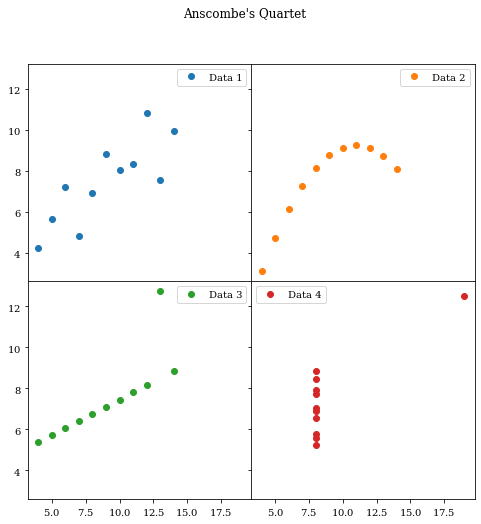

In [5]:
plotQuartet(data,colors)

De fire datasæt er åbenlyst meget forskellige.  

The four datasets are obviously very different.

# Statistikker 

# Statistics 

Lad os beregne gennemsnittene $\bar{x}$, $\bar{y}$ og varianserne $s_x^2$, $s_y^2$ for hvert datasæt og plotte det 

Let us calculate the average $\bar{x}$, $\bar{y}$ and the variables $s_x^2$, $s_y^2$ for each data set and plot it

In [6]:
def drawTable(cells,columns,colors,title=''):
    """Function to draw a table of values per data set"""
    rows = np.arange(1,len(cells)+1)

    fig, ax = plt.subplots(1,1,figsize=(1.5*len(columns),4))
    fig.suptitle(title)
    
    tab = ax.table(cellText=cells,
                   colLabels=columns,
                   rowLabels=rows,
                   rowColours=colors,
                   bbox=[0,0,1,1])
    tab.auto_set_column_width(range(len(columns)))
    tab.set_fontsize(15)
    ax.axis('tight')
    ax.axis('off')

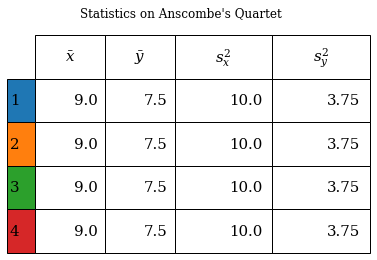

In [7]:
cells = np.round(np.hstack((data.mean(axis=1), data.var(axis=1))),2)
cols = [r'$\bar{x}$',r'$\bar{y}$',r'$s_x^2$',r'$s_y^2$']
drawTable(cells, cols, colors,'Statistics on Anscombe\'s Quartet')

# Lineær regression 

# Linear regression 

Vi vil udfører en [simpel lineær regression](https://en.wikipedia.org/wiki/Simple_linear_regression) på hver af data sættene.  Lineær regression består i at bestemme linjen 

$$y = ax + b\quad,$$

med 

We will perform a [simple linear regression](https://en.wikipedia.org/wiki/Simple_linear_regression) on each of the data sets. Linear regression consists of determining the line

$$y = ax + b\quad,$$

with

\begin{align*}
  a &= \frac{c_{xy}}{s_x^2} 
     = \frac{\tfrac1{N-1}\sum_{i=1}^N (x_i-\bar{x})(y_i-\bar{y})}{
         \tfrac1{N-1}\sum_{i=1}(x_i-\bar{x})^2}\\
  b &= \bar y - a\bar x\quad,
\end{align*}

hvor $c_{xy}$ er kovariansen mellem $x$ og $y$ og $s_x^2$ er variansen af $x$.  

where $c_{xy}$ is the covariance between $x$ and $y$ and $s_x^2$ is the variance of $x$. 

Korrelations koefficenten

The correlations coefficient

$$r = \frac{c_{xy}}{\sqrt{s_x^2 s_y^2}}\quad,$$

fortæller os hvor korreleret $x$ og $y$ er - eller umiddelbart hvor tæt på en linje punkterne falder.  

tells us how correlated $x$ and $y$ are - or naively how close to a line the points fall. 

Usikkerheden på $a$ er givet ved 

The uncertainty on $a$ is given by

\begin{align*}
  \delta_a &= \sqrt{(1-r^2)\frac1{\nu}\frac{s_y^2}{s_x^2}}\quad.
\end{align*}

Her er $s_y^2$ variansen af $y$, og $\nu=N-2$ er antallet af frihedsgrader ($N$ fra data, $-2$ svarende til de to parametre $a$ og $b$). Usikkerheden på $b$ er givet ved

Here the $s_y^2$ is the variance of $y$, and $\nu=N-2$ is the number of degrees of freedom ($N$ from data, $-2$ corresponding to the two parameters $a$ and $b$). The uncertainty on $b$ is given by 

$$\delta_b = \delta_a \sqrt{\frac1N\sum_{i}^{N} x_i^2}\quad.$$

Sandsynligheden for værdien $a$, givet vores punkter og med  $\nu$ frihedsgrader er givet ved en [$t$-fordeling](https://en.wikipedia.org/wiki/Student's_t-distribution), hvor 

The probability of the value $a$, given our points and with $\nu$ degrees of freedom is given by a [$t$-distribution](https://en.wikipedia.org/wiki/Student's_t-distribution) where

\begin{align*}
  t &= r \sqrt{\frac{\nu}{(1+r)(1-r)}}\quad,
\end{align*}

og 

and

\begin{align*}
  P(t|(x,y),\nu) &= 1-\int_{-\infty}^t \mathrm{d}t' f_t(t';\nu)\quad.
\end{align*}

Sandsynlighedsfunktionen for en $t$-fordelt tilfældig variabel $X\sim T$ er

The probability function of a $t$ distributed random variable $X\sim T$ is

$$f_t(t;\nu) = \frac{\Gamma\left(\tfrac{\nu+1}{2}\right)}{\sqrt{\nu\pi}\Gamma\left(\tfrac{\nu}{2}\right)}
\left(1+\frac{x^2}{\nu}\right)^{-\frac{\nu+1}{2}}\quad.$$

Vi kan nu udfører den lineære regression på hver af vore data sæt. Vi vil også beregne $\chi^2$ og bestemme sandsynligheden $P(\chi^2|\nu)$, hvor 

We can now perform the linear regression on each of our data sets. We will also calculate $\chi^2$ and determine the probability $P(\chi^2|\nu)$ with

$$\chi^2 = \sum_{i=1}^N (y_i-b-ax_i)^2\quad.$$

In [8]:
def linregOne(data,xrange,color,axes,label):
    """Function do and draw linear regression on one data set"""
    a,b,r,p,ea = sp.stats.linregress(data)
    eb         = ea * np.sqrt((data[:,0]**2).mean())
    chi2       = np.sum((data[:,1]-b-a*data[:,0])**2)
    pchi2      = sp.stats.chi2.sf(chi2,len(data[:,0])-2)
    axes.plot(data[:,0],data[:,1],'o',color=color,label=label)
    axes.plot(xrange,b+a*xrange,'--',color=color,
              label=label.replace('Data','Line'))
    
    return [a,b,r,ea,eb,p*100,chi2,pchi2*100]

In [9]:
def linregQuartet(data,colors):
    """Function to do and draw linear regression on full quarted"""
    fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(8,8),
                           gridspec_kw=dict(hspace=0,wspace=0),
                           sharex=True,sharey=True)
    fig.suptitle('Linear regression on Anscombe\'s Quartet')
    result = np.empty((0,8))

    xrange = np.array([data[...,0].min()-1,data[...,0].max()+1])
    for i,(da,axes,color) in enumerate(zip(data,ax.ravel(),colors)):
        res = linregOne(da,xrange,color,axes,f'Data {i+1}')
        result = np.vstack((result,res))
        axes.legend()
        
    return result

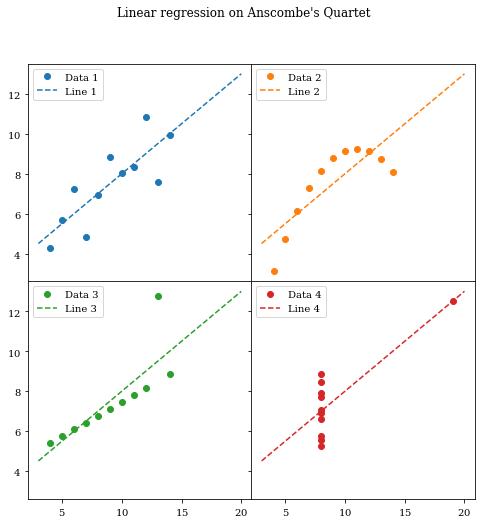

In [10]:
result = linregQuartet(data,colors)

Umiddelbart ser de fire linjer temmelig ens ud.  Heldigvis har vi nogle tal at kigge på.  

Off-hand, the four lines look pretty similar. Fortunately, we have some numbers to look at.  

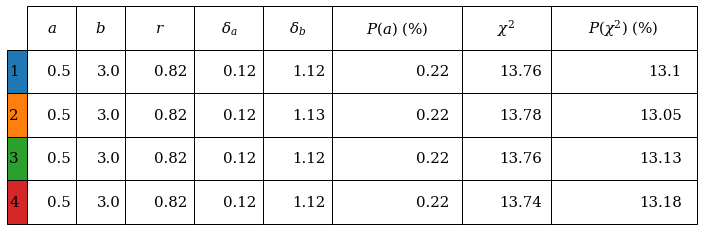

In [11]:
cells = np.round(result,2)
cols = [r'$a$',r'$b$',r'$r$',r'$\delta_a$',r'$\delta_b$',
        r'$P(a)$ (%)',r'$\chi^2$', r'$P(\chi^2)$ (%)']
drawTable(cells,cols,colors)

Af tabellen ovenover ser vi at vi _ikke_ kan skelne de fire data sæt fra hinanden: 

- I alle fire tilfælde finder vi den samme linje 

$$y = (3.0\pm1.1) + (0.50\pm0.12)x$$ 
  
- Sandsynlighederne for disse er alle lige dårlige 
- Alle $\chi^2$ kommer til den samme værdi med tilsvarende sandsynlighed. 

From the table above we see that we _cannot_ distinguish the four data sets from each other:

- In all four cases we find the same line

$$y = (3.0\pm1.1) + (0.50\pm0.12)x$$
  
- The probabilities of these are all equally bad
- All $\chi^2$ comes to the same value with the same probability.

Så hvor står vi nu? Vi kan ikke bruge en lineær regression til at skelne disse fire datasæt fra hinanden.  Havde vi kun tallene fra analysen ville vi I alle tilfælde antage at modellen 

$$y=b+ax$$ 

var adækvat.  På den anden side kan vi visuelt meget nemt skelne data sættene fra hinanden. 

So where are we now? We cannot use a linear regression to distinguish these four datasets from each other. If we only had the values from the analysis, we would in all cases assume that the model

$$y=b+ax$$

was adequate. On the other hand, we can visually very easily distinguish the data sets from each other.

- Data sæt 1 (blå) ligner noget vi ville forvente fra en lineær afhængighed med $y$ værdierne normalfordelt omkring linien.  
- I data sæt 2 (orange) er der en klar afhængighed mellem $x$ og $y$ som dog ikke lineær.   Faktisk ligner det at $y$ er kvadratisk afhængig af $x$. 
- Der er en klar lineær afhængighed mellem $x$ og $y$ i det trejde data sæt (grøn) _pånær_ i ét punkt.  Resten af punkterne ligger tilsyndeladende på en lige linie, om end ikke med den fundne hælding. 
- I det sidste datasæt (rød) er der _ingen_ afhængighed mellem $x$ og $y$, men som ovenover er der ét punkt der hiver i den lineære regression. 

- Data set 1 (blue) looks like something we would expect from a linear dependence and $y$ values normally distributed around the line.
- In data set 2 (orange) there is a clear dependence between $x$ and $y$ which, however, is not linear. In fact, it looks like $y$ has a square dependence on $x$.
- There is a clear linear dependency between $x$ and $y$ in the third data set (green) _except_ at one point. The rest of the points lie on a straight line, though not with the slope found.
- In the last data set (red), there is _no_ dependence between $x$ and $y$, but as above, there is one point that pulls in the linear regression.

# Konklussion

# Conclusion

I sin artikel angiver Anscombe ingen anden måde at skille de fire datasæt fra hinanden end ved visuel inspektion.  Det er heller ikke åbentlyst at der faktisk _er_ en anden kvantitativ måde at gøre det på. Hoved pointen med Anscombes artikel er at sige at vi _også_ må bruge grafiske repræsentationer i vores arbejde med statistik.  I 1973, da Anscombe udgav sin artikel var computere slet ikke så kraftige som de er i dag, og en pointe for Anscombe var at vi må arbejde for at løse _det_ problem. 

In his article, Anscombe does not indicate any other way of distinguishing the four datasets from each other than by visual inspection. Nor is it obvious that there _is_ another quantitative way of doing this. The main point of Anscombe's article is to say that we must _also_ use graphic representations in our statistical work. In 1973, when Anscombe published his article, computers were not as powerful as they are today, and a point for Anscombe was that we had to work to solve _that_ problem.

>  Unfortunately, most persons who have recourse to a
> computer for statistical analysis of data are not much
> interested either in computer programming or in sta-
> tistical method, being primarily concerned with their
> own proper business. Hence the common use of library
> programs and various statistical packages. Most of
> these originated in the pre-visual era. The user is not
> showered with graphical displays. He can get them
> only with trouble, cunning and a fighting spirit. It's
> time that was changed.

I dag har vi gode muligheder for nemt og hurtigt at lave grafiske repræsentationer af høj kvalitet, som illustereret i denne note med _Python_, _NumPy_, _SciPy_ og _MatPlotLib_.  Så lad os slutte af hvor vi startede og afslutte titlen af denne note: 

> **Ancsombes Kvartet, eller: Hvordan jeg holdt op med at bekymre mig og elske en god graf**

Today we have good opportunities to easily and quickly make graphic representations of high quality, as illustrated in this note using _Python_, _NumPy_, _SciPy_ and <_> MatPlotLib <_>. Let us finish where we started and finish the title of this note:

> **Ancsombes Quartet, or: How I stopped worrying and love a good plot**

# Referencer

# References

- [Anscombe, Francis J. Graphs in statistical analysis. _The American Statistician_, **27**, 17–21](https://doi.org/10.2307/2682899)